In [54]:
# Step 1: Understanding data
# Step 2: Data description, what the column describes
# Step 3: Understand theory and equation of any machine learning algorithm
# Step 4: Import necesassry python lib (pandas, numpy, matplotlib, seaborn, sklearn)
# Step 5: Load the real world data set
# Step 6: Exploratory Data Analysis (EDA)
# Step 7: Preprocess data (feature selection, train, test split)
# Step 8: Train the machine learning algorithm (supervised, unsupervised learning)
#          Actual data - Predicted data
# Step 9: Evaluation performance metrics (Linear Regression: MSE (Mean Squared Error), R-squared)
#         Logistic regression, decision tree, random tree
#         Confusion metrics, 
# Step 10: Visualizing the results based on your performance metrics
# Step 11: Insight on the data or the choosen machine learning algorithms

In [55]:
# Predictive modeling
# Training analysis
# Exploring E commerce sales dynamics

In [56]:
#!pip install pandas
#!pip install seaborn

In [57]:
import pandas as pd # for data manipulation
import seaborn as sns # for data visualization
import matplotlib.pyplot as plt # data visualization

import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv("Ecommerce_Sales_Prediction_Dataset.csv")

In [59]:
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [60]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [61]:
df.shape

(1000, 7)

In [62]:
df.isnull().sum()

Date                0
Product_Category    0
Price               0
Discount            0
Customer_Segment    0
Marketing_Spend     0
Units_Sold          0
dtype: int64

In [63]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


Text(0.5, 1.0, 'Correlation heatmap')

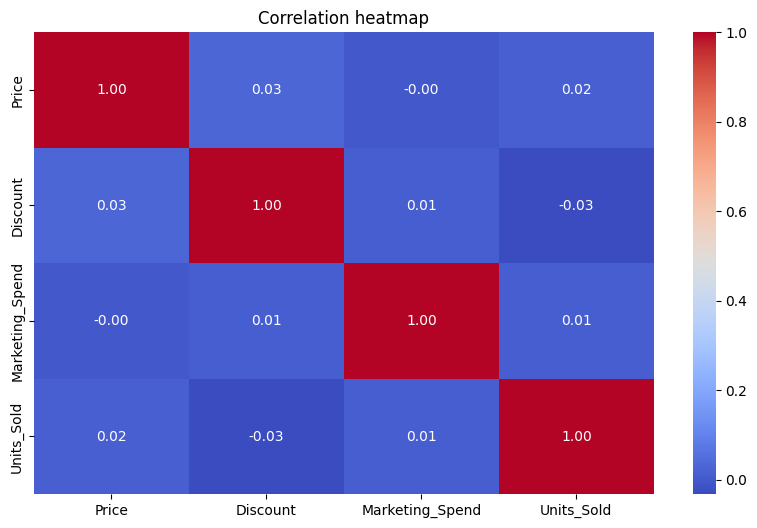

In [64]:
df_numerical = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = df_numerical.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation heatmap')

In [65]:
df['Date'] = pd.to_datetime(df['Date'], format="%d-%m-%Y")
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year
df['day'] = df['Date'].dt.day

In [66]:
df.head(2)

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,Year,day
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,1,2023,1
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,1,2023,2


In [67]:
df['Revenue'] = round(df['Price'] * df['Units_Sold'])
df.head(2)

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,Year,day,Revenue
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,1,2023,1,29850.0
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,1,2023,2,9112.0


In [72]:
df['ROI'] = ((df['Revenue'] - df['Marketing_Spend']) / df['Marketing_Spend'])
df.head(2)

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold,Month,Year,day,Revenue,ROI
0,2023-01-01,Sports,932.80,35.82,Occasional,6780.38,32,1,2023,1,29850.0,3.402408
1,2023-01-02,Toys,569.48,3.60,Premium,6807.56,16,1,2023,2,9112.0,0.338512


In [74]:
df['Product_Category'].value_counts()

Product_Category
Electronics    210
Sports         206
Toys           204
Home Decor     190
Fashion        190
Name: count, dtype: int64

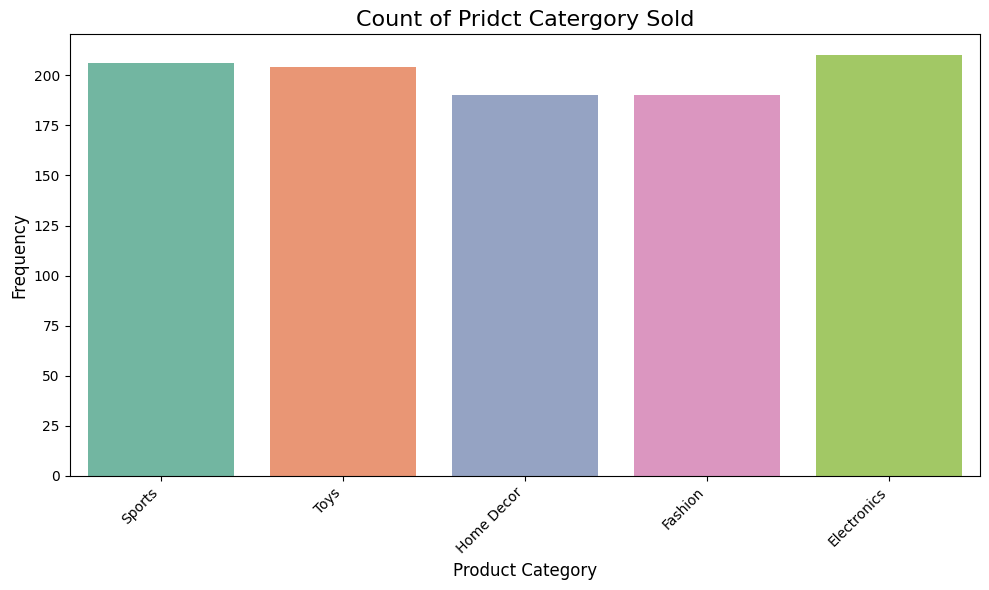

In [75]:
plt.figure(figsize= (10, 6))
sns.countplot(x = 'Product_Category', data = df, palette='Set2')
plt.title('Count of Pridct Catergory Sold', fontsize = 16)
plt.xlabel('Product Category', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.xticks(rotation = 45, ha='right')
plt.tight_layout()
plt.show()

In [78]:
salewisecat = df.groupby('Product_Category')['Units_Sold'].sum().rename('Total_sales').reset_index()
saleswisecat = salewisecat.sort_values(by='Total_sales', ascending=False)
saleswisecat

,Product_Category,Total_sales
0,Electronics,6210
3,Sports,6125
4,Toys,6003
1,Fashion,5650
2,Home Decor,5643


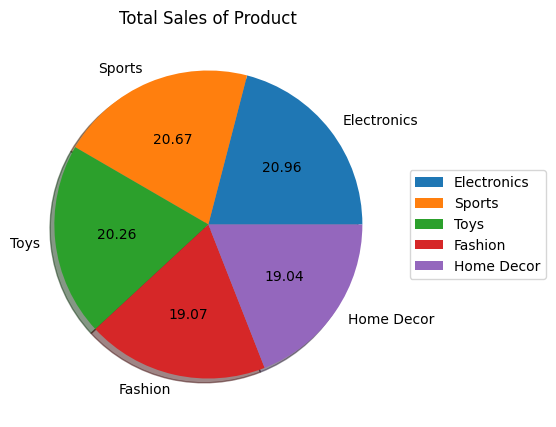

In [79]:
plt.figure(figsize = (10, 5))
plt.pie(saleswisecat['Total_sales'], labels = saleswisecat['Product_Category'], shadow = True, autopct='%1.2f')
plt.title('Total Sales of Product')
plt.legend(loc='center', bbox_to_anchor=(1.2, 0.5))
plt.show()

In [ ]:
monthwisesales = df.groupby(['Year', 'Month'])['Units_Sold'].sum().rename('Month_Sales').reset_index()
monthwisesales

,Year,Month,Month_Sales
0,2023,1,858
1,2023,2,861
2,2023,3,920
3,2023,4,862
4,2023,5,971
5,2023,6,878
6,2023,7,943
7,2023,8,954
8,2023,9,814
9,2023,10,961


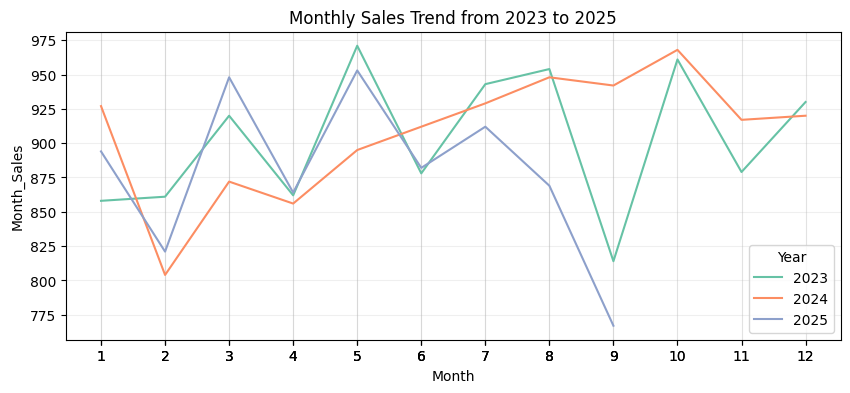

In [87]:
plt.figure(figsize=(10,4))
sns.lineplot(x=monthwisesales['Month'], y = monthwisesales['Month_Sales'], palette='Set2', hue = monthwisesales['Year'])
plt.xticks(ticks =  monthwisesales['Month'])
plt.title('Monthly Sales Trend from 2023 to 2025')
plt.grid(True, alpha=0.2)
plt.show()

In [93]:
product_metrics = df.groupby('Product_Category').agg({'Units_Sold':'sum', 'Price':'mean', 'Discount':'mean', 'Marketing_Spend':'sum', 'Revenue':'sum', 'ROI':'mean'}).reset_index()

product_metrics

,Product_Category,Units_Sold,Price,Discount,Marketing_Spend,Revenue,ROI
0,Electronics,6210,488.481857,25.134905,1064353.55,3022449.0,5.114461
1,Fashion,5650,522.460789,26.627158,920954.79,2968169.0,7.581084
2,Home Decor,5643,492.196737,22.137368,938726.12,2779863.0,5.775155
3,Sports,6125,526.164903,24.038592,978248.01,3201411.0,6.981806
4,Toys,6003,497.479559,26.589265,1010547.77,3030598.0,4.619950


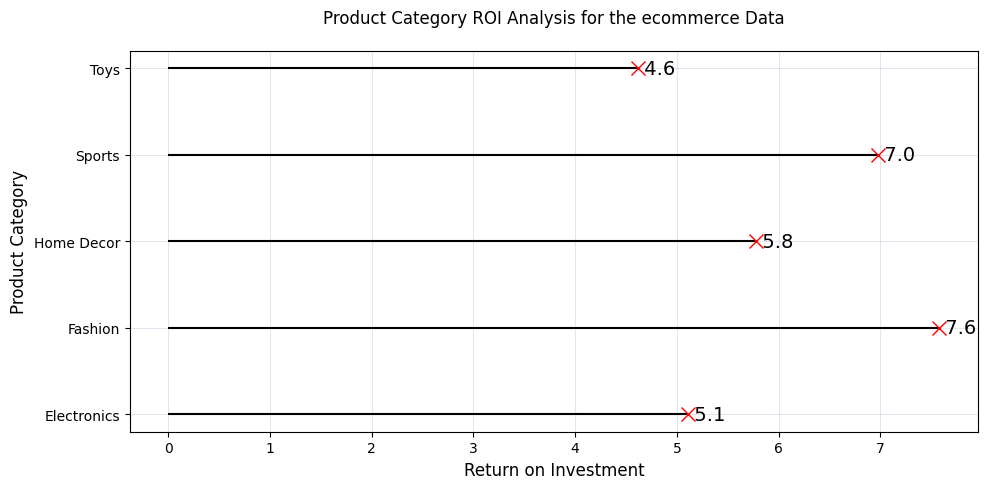

In [94]:
plt.figure(figsize=(10,5))
plt.hlines(y=product_metrics['Product_Category'], xmin = 0, xmax = product_metrics['ROI'], color = 'black')
plt.plot(product_metrics['ROI'], product_metrics['Product_Category'], 'x', markersize = 10, color='red')
plt.title('Product Category ROI Analysis for the ecommerce Data', fontsize = 12, pad=20)
plt.xlabel("Return on Investment", fontsize = 12)
plt.ylabel("Product Category", fontsize = 12)

for i, v in enumerate(product_metrics['ROI']):
    plt.text(v, i, f' {v:1.1f}', va = 'center', fontsize=14)

plt.grid(True, alpha = 0.1, color = 'navy')
plt.tight_layout()
plt.show()
